In [ ]:

import os
import sys
import numpy as np
# import widgets
sys.path.append('pytorch-dc-tts/')
sys.path.append('pytorch-dc-tts/models')
sys.path.append("tacotron_pytorch/")
sys.path.append("tacotron_pytorch/lib/tacotron")


# For the Tacotron
from text import text_to_sequence, symbols
# from util import audio

from tacotron_pytorch import Tacotron
from synthesis import tts as _tts

# For Audio/Display purposes
import librosa.display
import IPython
from IPython.display import Audio
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

def visualize(alignment, spectrogram):
    label_fontsize = 16
    figure(figsize=(16,16))
    
    subplot(2,1,1)
    imshow(alignment.T, aspect="auto", origin="lower", interpolation=None)
    xlabel("Decoder timestamp", fontsize=label_fontsize)
    ylabel("Encoder timestamp", fontsize=label_fontsize)
    colorbar()

    subplot(2,1,2)
    librosa.display.specshow(spectrogram.T, sr=fs, 
                             hop_length=hop_length, x_axis="time", y_axis="linear")
    xlabel("Time", fontsize=label_fontsize)
    ylabel("Hz", fontsize=label_fontsize)
    tight_layout()
    colorbar()

model = Tacotron(n_vocab=len(symbols),
                 embedding_dim=256,
                 mel_dim=80,
                 linear_dim=1025,
                 r=5,
                 padding_idx=None,
                 use_memory_mask=False,
                 )


def tts_tacotron(model, text, figures = True):
    waveform, alignment, spectrogram = _tts(model, text)
    if figures:
        visualize(alignment, spectrogram)
    return waveform, alignment, spectrogram 

def present(waveform, Emotion, figures=False):
  # if figures!=False:
  #       visualize(figures[0], figures[1], Emotion)
  IPython.display.display(Audio(waveform, rate=fs))

  
fs = 20000 #20000
hop_length = 250
model.decoder.max_decoder_steps = 900

# Experiment 1

In [ ]:
#@title Select the emotion and type the text
import torch
%pylab inline

Text = 'Fly me to the moon Let me play among the stars.'

wav, align, mel = None, None, None


checkpoint = torch.load('pretrained_ljspeech.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])
wav, align, mel = tts_tacotron(model, Text)

present(wav, "", (align,mel))



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Fear

### 2000 epochs
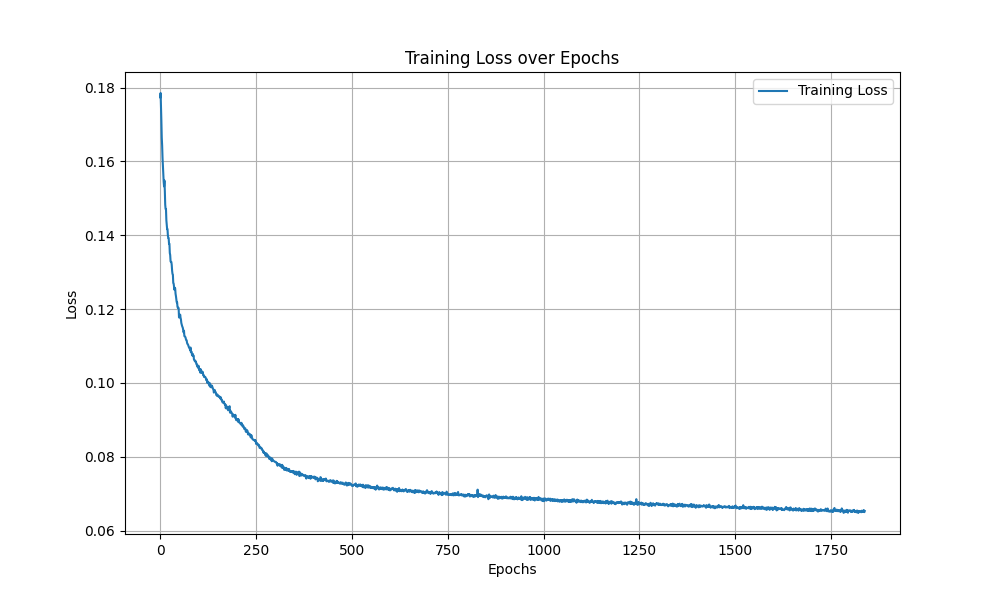


### 5000 epochs
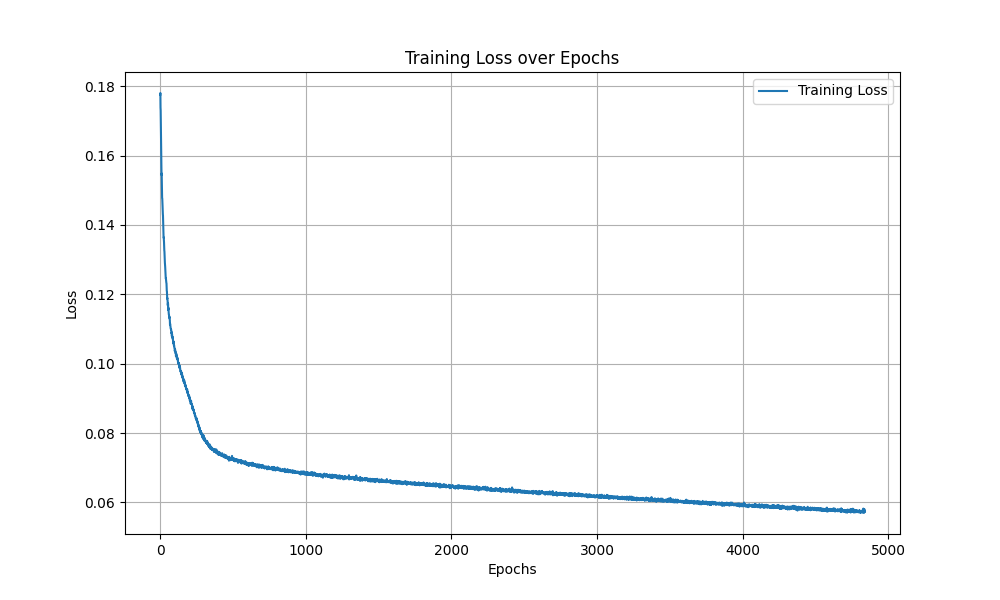

In [ ]:
#@title Select the emotion and type the text
import torch
emotion = 'fear'

Text = 'Fly me to the moon Let me play among the stars.'
wav, align, mel = None, None, None


checkpoint = torch.load(f'models/experiment1/{emotion}/2000.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])
wav, align, mel = tts_tacotron(model, Text)

present(wav, "", (align,mel))

checkpoint = torch.load(f'models/experiment1/{emotion}/5000.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])
wav, align, mel = tts_tacotron(model, Text)

present(wav, "", (align,mel))

## Angry

### 2000 epochs
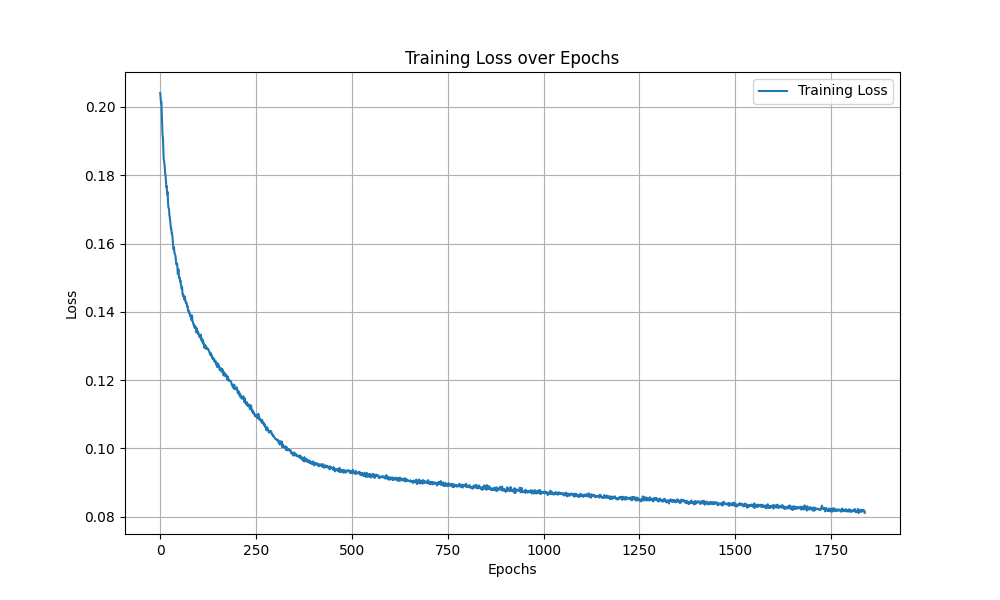

### 5000 epochs
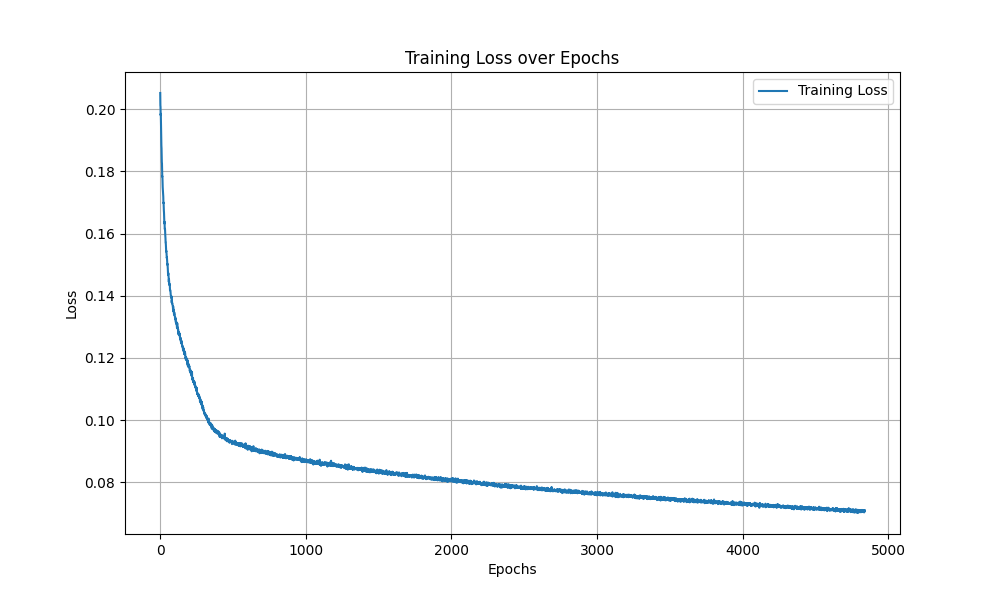

In [16]:
#@title Select the emotion and type the text
import torch
emotion = 'angry'

Text = 'Fly me to the moon Let me play among the stars.'
wav, align, mel = None, None, None


checkpoint = torch.load(f'models/experiment1/{emotion}/2000.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])
wav, align, mel = tts_tacotron(model, Text)

present(wav, "", (align,mel))

checkpoint = torch.load(f'models/experiment1/{emotion}/5000.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])
wav, align, mel = tts_tacotron(model, Text)

present(wav, "", (align,mel))

FileNotFoundError: [Errno 2] No such file or directory: 'models/experiment1/angry/5000.pth'

## Happy

### 2000 epochs
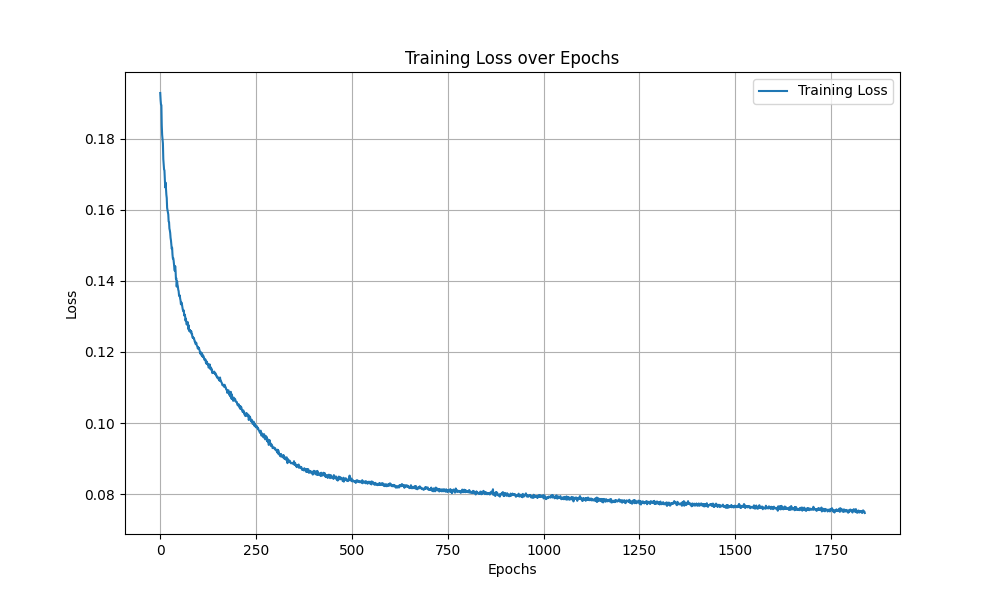

### 5000 epochs
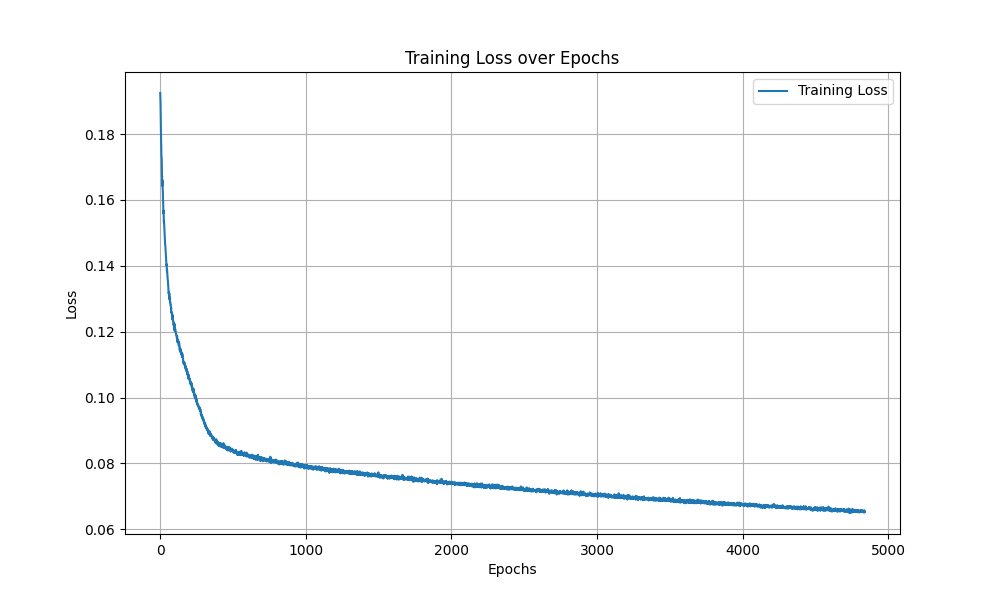

In [17]:
#@title Select the emotion and type the text
import torch
emotion = 'happy'

Text = 'Fly me to the moon Let me play among the stars.'
wav, align, mel = None, None, None


checkpoint = torch.load(f'models/experiment1/{emotion}/2000.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])
wav, align, mel = tts_tacotron(model, Text)

present(wav, "", (align,mel))

checkpoint = torch.load(f'models/experiment1/{emotion}/5000.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])
wav, align, mel = tts_tacotron(model, Text)

present(wav, "", (align,mel))